In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot

import sys
sys.path.append('../scripts/')

# Our helper, with the functions: 
# plot_vector, plot_linear_transformation, plot_linear_transformations
from plot_helper import *

## Example 1

Consider the following four points in $\mathbb{R}^3$: 

$a_1 = (-1,-0.5,0.5)^T, \, a_2 = (2,1,-1)^T \, a_3 = (4,2,-2)^T, a_4 = (5,2.6,-2.6)^T$. 


We are looking for the best fit 1-dim and 2-dim linear subspaces of $\mathbb{R}^3$ which **minimizes the sum of squares of perpendicular distances** from the points $a_1, a_2, a_3$ and $a_4$. In the last two lectures we learned that the so-called **greedy algorithm** finds the best **perpendicular least square fit**. Usually in the application, we have many many more points than the number of dimensions, nonetheless we can solve the perpendicular least square fit for two points and this will reveal something important.

First, we put the points $a_i$ into a matrix whose rows are given by the points $a_i^T$. 

In [2]:
A = np.array([[-1, -0.5, 0.5],[2,1,-1],[4,2,-2],[5,2.6,-2.6]])
print(A)

[[-1.  -0.5  0.5]
 [ 2.   1.  -1. ]
 [ 4.   2.  -2. ]
 [ 5.   2.6 -2.6]]


To get the singular values and singular vectors of $A$ we compute the eigenvalues and eigenvectors of square symmetric matrices $A^T A$ and $A A^T$. 

We recall that given an SVD factorization $A = U \Sigma V^T$, we have: 
- The non-zero **singular values** of $A$ (i.e. the non-zero diagonal entries of $\Sigma$) are the square-root of non-zero eigenvalues of $A^T \, A$ (same as non-zero eigenvalues of $A A^T$).
- The **right** singular eigenvectors (i.e. the columns of $V$) of $A$ are the eigenvectors of $A^T \, A$. 
- The **left** singular eigenvectors (i.e. the columns of $U$) of $A$ are the eigenvectors of $A \, A^T$. 

To see why these statements are true, observe that 

$$ A^T \, A = (U \Sigma V^T)^T (U \Sigma V^T) = (V^T)^T \Sigma^T U^T U \Sigma V^T = V \Sigma^T \Sigma V^T$$ 
which is a spectral decomposition of $A^T \, A$, and 

$$ A \, A^T = (U \Sigma V^T) (U \Sigma V^T)^T = U \Sigma V^T V \Sigma^T U^T = U \Sigma^T \Sigma U^T$$ 
which is a spectral decomposition of $A \, A^T$. 


Let's compute the matrices $A^T \, A$ and $A \, A^T$. 

In [3]:
print(A.transpose())

print ("\n AT A:")
print(A.transpose() @ A)


print ("\n A AT:")
print(A @ A.transpose())

[[-1.   2.   4.   5. ]
 [-0.5  1.   2.   2.6]
 [ 0.5 -1.  -2.  -2.6]]

 AT A:
[[ 46.    23.5  -23.5 ]
 [ 23.5   12.01 -12.01]
 [-23.5  -12.01  12.01]]

 A AT:
[[ 1.5  -3.   -6.   -7.6 ]
 [-3.    6.   12.   15.2 ]
 [-6.   12.   24.   30.4 ]
 [-7.6  15.2  30.4  38.52]]


We notice that both matrices $A$ and $A^T A$ are not of full rank since in $A$ the second and the third columns are scalars of the first column and in the matrix $A^T A$ the second and the third columns are linearly dependent. 

We can compute the ranks of matrices using the function `np.linalg.matrix_rank`. 

In [4]:
print("The rank of matrix A is", np.linalg.matrix_rank(A), "which is less than", A.shape[1], "(the number of columns)")

print("The rank of matrix (AT A) is", np.linalg.matrix_rank(A.transpose() @ A), "which is less than", (A.transpose() @ A).shape[1], "(the number of columns)")

The rank of matrix A is 2 which is less than 3 (the number of columns)
The rank of matrix (AT A) is 2 which is less than 3 (the number of columns)


We can compute the eigenvalues and eigenvectors of a matrix using [`numpy.linalg.eig()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html). It returns a tuple: its first element is an array with the eigenvalues, and its second element is a 2D array where each column is an eigenvector.
The matrix $A^T A$ is a singular 3-by-3 symmetric matrix and therefore, and therefore, at least one of its eigenvalues is zero. 

In [5]:
np.linalg.eig(A.transpose() @ A)

(array([ 7.00140012e+01,  5.99880014e-03, -2.08113149e-15]),
 array([[ 8.10544295e-01,  5.85677340e-01, -6.93953889e-14],
        [ 4.14136418e-01, -5.73141367e-01,  7.07106781e-01],
        [-4.14136418e-01,  5.73141367e-01,  7.07106781e-01]]))

This is a little unreadable. First, we want to extract all the eigenvalues and ignore the eigenvectors. We do this by projecting out the first coordinate of eigenvalue-eigenvector pairs. 

In [6]:
np.linalg.eig(A.transpose() @ A)[0]

array([ 7.00140012e+01,  5.99880014e-03, -2.08113149e-15])

This shows that the first two eigenvalues are non-zero and the last one is zero (accounting for the rounding error in the floating real number computation). 

Now, we extract the eigenvectors corresponding to the eigenvalues we just got.

In [7]:
np.linalg.eig(A.transpose() @ A)[1]

array([[ 8.10544295e-01,  5.85677340e-01, -6.93953889e-14],
       [ 4.14136418e-01, -5.73141367e-01,  7.07106781e-01],
       [-4.14136418e-01,  5.73141367e-01,  7.07106781e-01]])

The columns in the array above gives the right singular vectors. For instance the first right singular vector is 

$$\begin{bmatrix} .810544295  \\ .414136418 \\ -.414136418   \end{bmatrix} $$

We could have computed the singular values directly using [`numpy.linalg.svd()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html). It returns a tuple: the first element is a 2D array where each column is a left singular vector, the second element is a 1D array of the singular values, and the third element is a 2D array where each row is a right singular vector.

In [8]:
U, S, VT = numpy.linalg.svd(A)

In [9]:
print ("\n S:")
print (S)

print ("\n U:")
print (U)

print ("\n V:")
print (VT.T)


 S:
[8.36743696e+00 7.74519215e-02 2.57165975e-18]

 U:
[[-1.46362706e-01 -1.61854892e-01 -9.63564620e-01 -1.54674419e-01]
 [ 2.92725412e-01  3.23709783e-01 -2.38117909e-01  8.67654120e-01]
 [ 5.85450823e-01  6.47419567e-01 -1.21832201e-01 -4.72495665e-01]
 [ 7.41712293e-01 -6.70718178e-01  2.33730989e-15  4.13289860e-16]]

 V:
[[ 0.81054429  0.58567734  0.        ]
 [ 0.41413642 -0.57314137  0.70710678]
 [-0.41413642  0.57314137  0.70710678]]


In [10]:
v1 = VT.T[ : , 0]
v2 = VT.T[ : , 1]

print ("v1: " , v1)
print("v2: ",  v2)

v1:  [ 0.81054429  0.41413642 -0.41413642]
v2:  [ 0.58567734 -0.57314137  0.57314137]


In [11]:
print (v1[0]/v1[1])

1.9571915404196962


Therefore, the best fit line in $\mathbb{R}^3$ which minimizes the sum of squares of perpendicular distances is the line spanned by the vector 
$$v_1 = \begin{bmatrix} .810544295 \\ .414136418 \\ -.414136418   \end{bmatrix} $$

This line can be described by the set
$$ \{  \lambda v_1 \mid \lambda \in \mathbb{R} \} = \bigg\{ \begin{bmatrix} 1.95719152157639 \lambda  \\ \lambda \\  - \lambda  \end{bmatrix} \mid  \lambda \in \mathbb{R}  \bigg\} $$

which is very close to the line 

$$ \{  \lambda v_1 \mid \lambda \in \mathbb{R} \} = \bigg\{ \begin{bmatrix} 2 \lambda  \\ \lambda \\  - \lambda  \end{bmatrix} \mid  \lambda \in \mathbb{R}  \bigg\} $$

We should have known this even before using SVD and Greedy Algorithm since all the points $$a_1 = (-1,-0.5,0.5)^T, \, a_2 = (2,1,-1)^T \, a_3 = (4,2,-2)^T$$ are collinear, as they are on the line spanned by the vector $v_1 = (2,1,-1)^T$, and the point $a_4$ is almost on this line. Therefore this is the line which is the closest to these points. We could have guessed this before SVD. 

What is the best fit plane for these points. Greedy algorithm tells us that is the plane generated by the vector $v_1$ and 

$$ v_2  = \begin{bmatrix} 0.58567734  \\ .414136418 \\ -.414136418   \end{bmatrix}  $$ 



We would like to find a way to visualize this plane. Here's the idea: given vectors $v_1$ and $v_2$ we find a vector perpendicular to the plane spanned by them. This is the so-called normal vector and is given by the cross-product of $v_1$ and $v_2$. 

$$\vec{v_1}\times\vec{v_2}=
\mathrm{det}
\begin{bmatrix}
      \hat{i} & \hat{j} & \hat{k}\\ 
      v_{11} &   v_{12} & v_{13} \\ 
      v_{21} &   v_{22} & v_{23}
   \end{bmatrix}$$

In [12]:
# the cross product is a vector normal to the plane
cp = np.cross(v1, v2)
a, b, c = cp

print('The equation describing the plane spanned by v1 and v2 is {0}x + {1}y + {2}z = 0'.format(a, b, c))




The equation describing the plane spanned by v1 and v2 is 2.7755575615628914e-17x + -0.7071067811865475y + -0.7071067811865472z = 0


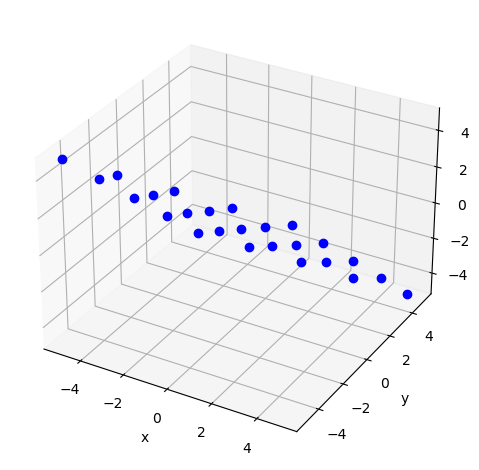

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


plt.xlabel("x")
plt.ylabel("y")

x = np.linspace(-5, 5, 5)
y = np.linspace(-5, 5, 5)
X, Y = np.meshgrid(x, y)

Z = (- a * X - b * Y) / c




# plot the mesh. Each array is 2D, so we flatten them to 1D arrays
ax.plot(X.flatten(),
        Y.flatten(),
        Z.flatten(), 'bo ')



# plot the original points. We use zip to get 1D lists of x, y and z
# coordinates.
# ax.plot(*zip(p1, p2, p3), color='r', linestyle=' ', marker='o')

# adjust the view so we can see the point/plane alignment
#ax.view_init(0, 22)
plt.tight_layout()
# plt.savefig('images/plane.png')
plt.show()





## Example 2

Consider the following two points in $\mathbb{R}^3$: 

$a_1 = (1,-2,1)^T, \, a_2 = (0,0,1)^T$

Again, we are looking for the best fit 1-dim and 2-dim linear subspaces of $\mathbb{R}^3$ which **minimizes the sum of squares of perpendicular distances** from the points $a_1$ and $a_2$. Note that these points are colinear as for any two distinct points there is a unique line in $\mathbb{R}^3$ which passes through them. This line is given by the collection of all vectors 
$$ \alpha \begin{bmatrix} -1 \\ 2 \\ 0  \end{bmatrix} + \begin{bmatrix} 0 \\ 0 \\ 1  \end{bmatrix}  = \begin{bmatrix} - \alpha \\ 2 \alpha \\ 1  \end{bmatrix}$$ 

for all real numbers $\alpha$. Note that this line is an affine line, that is it does not pass through the origin. As such this affine line is not a linear subspace since every linear subspace must have the origin in it. So, we expect that the greedy algorithm for finding the best perpendicular linear subspace should not return this affine line as its output. 

To see what the output of the greedy algorithm is, put the points $a_i$ into a matrix whose rows are given by the points $a_i^T$. 

In [14]:
A = np.array([[1,-2,1], [0,0,1]])
print(A)

[[ 1 -2  1]
 [ 0  0  1]]


Let's compute the SVD of $A$. 

In [15]:
U, S, VT = numpy.linalg.svd(A)

In [16]:
print ("\n S:")
print (S)

print ("\n U:")
print (U)

print ("\n V:")
print (VT.T)


 S:
[2.48848998 0.89856419]

 U:
[[ 0.98195639 -0.18910752]
 [ 0.18910752  0.98195639]]

 V:
[[ 3.94599292e-01 -2.10455217e-01 -8.94427191e-01]
 [-7.89198585e-01  4.20910435e-01 -4.47213595e-01]
 [ 4.70592172e-01  8.82350841e-01  1.51208770e-16]]


## Example 3

Consider the following points in $\mathbb{R}^3$: 

$a_1 = (1,0,0)^T, \, a_2 = (-1,1,0)^T, \, a_3 = (0,-1,1)^T, \, a_4 = (0,0,1)^T$

We are looking for the best fit 1-dim and 2-dim linear subspaces of $\mathbb{R}^3$ which **minimizes the sum of squares of perpendicular distances** from the points $a_1, a_2, a_3$, and $a_4$. In the last two lectures we learned that the so-called greedy algorithm finds the best **perpendicular least square fit**. First, we put the points $a_i$ into a matrix whose rows are given by the points $a_i^T$. 

In [17]:
A = np.array([[1,0,0], [-1,1,0], [0,-1,1], [0,0,-1]])
print(A)

[[ 1  0  0]
 [-1  1  0]
 [ 0 -1  1]
 [ 0  0 -1]]


The matrix $A$ is known as the matrix of **finite differences** since 

$$ A \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} = \begin{bmatrix} x_1 \\ x_2 - x_1 \\ x_3 - x_2 \\ x_3 \end{bmatrix} $$ 

To get the singular values and singular vectors of $A$ we are interested in computing the eigenvalues and eigenvectors of square symmetric matrices $A^T A$ and $A A^T$. First let's see what they are. 

To get the singular values and singular vectors of $A$ we are interested in computing the eigenvalues and eigenvectors of square symmetric matrices $A^T A$ and $A A^T$. First let's see what they are. 

In [18]:
print(A.transpose())

print ("\n A^T A:")
print(A.transpose() @ A)


print ("\n A A^T:")
print(A @ A.transpose())



[[ 1 -1  0  0]
 [ 0  1 -1  0]
 [ 0  0  1 -1]]

 A^T A:
[[ 2 -1  0]
 [-1  2 -1]
 [ 0 -1  2]]

 A A^T:
[[ 1 -1  0  0]
 [-1  2 -1  0]
 [ 0 -1  2 -1]
 [ 0  0 -1  1]]


We can compute the eigenvalues and eigenvectors of a matrix using [`numpy.linalg.eig()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html). It returns a tuple: its first element is an array with the eigenvalues, and its second element is a 2D array where each column is an eigenvector.

Our matrix is a full rank 3 by 3 symmetric matrix and therefore all its eigenvalues are non-zero real numbers. 

In [19]:
np.linalg.eig(A.transpose() @ A)

(array([3.41421356, 2.        , 0.58578644]),
 array([[-5.00000000e-01, -7.07106781e-01,  5.00000000e-01],
        [ 7.07106781e-01,  5.09486455e-16,  7.07106781e-01],
        [-5.00000000e-01,  7.07106781e-01,  5.00000000e-01]]))

We can extract first all the eigenvalues as follows:

In [20]:
np.linalg.eig(A.transpose() @ A)[0]

array([3.41421356, 2.        , 0.58578644])

Note that these are float approximations to $2 + \sqrt{2}$, $2$, and $2- \sqrt{2}$. 

We can also separately get all the eigenvectors:

In [21]:
np.linalg.eig(A.transpose() @ A)[1]

array([[-5.00000000e-01, -7.07106781e-01,  5.00000000e-01],
       [ 7.07106781e-01,  5.09486455e-16,  7.07106781e-01],
       [-5.00000000e-01,  7.07106781e-01,  5.00000000e-01]])

Let's display each eigenvalue with the corresponding eigenvector, side by side.

In [22]:
eigenvalues, eigenvectors = np.linalg.eig(A.transpose() @ A)

for eigenvalue, eigenvector in zip(eigenvalues, eigenvectors.T):
    print(eigenvalue, eigenvector)

3.4142135623730923 [-0.5         0.70710678 -0.5       ]
2.0 [-7.07106781e-01  5.09486455e-16  7.07106781e-01]
0.5857864376269046 [0.5        0.70710678 0.5       ]


To create the diagonal matrix of eigenvalues, use [`numpy.diag()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.diag.html): if you give it a 1D array, it returns a 2D array with the elements of the input array in the diagonal. 

The eigendecomposition is shown below: 

In [23]:
X = eigenvectors
A_decomp = X @ numpy.diag(eigenvalues) @ numpy.linalg.inv(X)

print(numpy.diag(eigenvalues))
print(X)
print(A_decomp)

[[3.41421356 0.         0.        ]
 [0.         2.         0.        ]
 [0.         0.         0.58578644]]
[[-5.00000000e-01 -7.07106781e-01  5.00000000e-01]
 [ 7.07106781e-01  5.09486455e-16  7.07106781e-01]
 [-5.00000000e-01  7.07106781e-01  5.00000000e-01]]
[[ 2.00000000e+00 -1.00000000e+00 -8.58450316e-16]
 [-1.00000000e+00  2.00000000e+00 -1.00000000e+00]
 [-7.67631909e-16 -1.00000000e+00  2.00000000e+00]]


Note that these eigenvectors are the **right singular vectors** of the matrix $A$. Putting them as columns of a matrix results in the orthogonal matrix $V$ is the SVD factorization $A = U \Sigma V^T$. 


Indeed, if we compute these eigenvectors by hand we notice that the matrix $V$ is in fact given by 


$$V = \begin{bmatrix} \frac{-1}{2} & \frac{-\sqrt{2}}{2} &  \frac{1}{2} \\ \\ \frac{\sqrt{2}}{2} & 0 & \frac{\sqrt{2}}{2} \\ \\  \frac{-1}{2} &  \frac{\sqrt{2}}{2} & \frac{1}{2} \end{bmatrix}$$

Another good choice for the matrix $V$ of right singular vectors is the Discrete Sine Transform whose $ij$-entry is given by the formula $\sin(i \, j \,  \pi/4)$: 

$$\frac{1}{\sqrt{2}}
\begin{bmatrix} \sin(\frac{\pi}{4}) & \sin(\frac{2\pi}{4}) &  \sin(3\frac{\pi}{4}) \\ \\ \sin(\frac{2\pi}{4}) & \sin(\frac{4\pi}{4}) & \sin(\frac{6\pi}{4}) \\ \\  \sin(\frac{3\pi}{4}) &  \sin(\frac{6\pi}{4}) & \sin(\frac{9\pi}{4}) \end{bmatrix}$$


In any case, note that as expected $V$ is an orthonormal matrix. 

Let's confirm that the non-zero eigenvalues of $A A^T$ agree with the eigenvalues of $A^T A$. 

In [24]:
np.linalg.eig(A @ A.transpose())[0]

array([3.41421356e+00, 2.00000000e+00, 1.75356880e-19, 5.85786438e-01])

The matrix $A A^T$ is singular and therefore one of its eigenvalues is zero: the one that `Python` represents by the floating number $1.75356880e-19$. 

Similarly, the matrix $U$ in the SVD $A = U \, \Sigma \, V^T$ is obtained as the matrix whose columns are the eigenvectors of $A A^T$. Again, the spectral theorem ensures an orthonormal $U$. 

A good choice of matrix $U$ of **left singular vectors** is the Discrete Cosine Transform (DCT) whose $ij$-entry is given by the formula $$\cos( \, i + \frac{1}{2} )\, j \, (π/4).$$

The DCT matrices have been essential to the JPEG image compressions. 

We could have computed the singular values directly using [`numpy.linalg.svd()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html). It returns a tuple: the first element is a 2D array where each column is a left singular vector, the second element is a 1D array of the singular values, and the third element is a 2D array where each row is a right singular vector.

In [25]:
U, S, VT = numpy.linalg.svd(A)



In [26]:
print ("\n S:")
print (S)

print ("\n U:")
print (U)

print ("\n V:")
print (VT.T)


 S:
[1.84775907 1.41421356 0.76536686]

 U:
[[-0.27059805  0.5         0.65328148  0.5       ]
 [ 0.65328148 -0.5         0.27059805  0.5       ]
 [-0.65328148 -0.5        -0.27059805  0.5       ]
 [ 0.27059805  0.5        -0.65328148  0.5       ]]

 V:
[[-5.00000000e-01  7.07106781e-01  5.00000000e-01]
 [ 7.07106781e-01 -3.17973149e-15  7.07106781e-01]
 [-5.00000000e-01 -7.07106781e-01  5.00000000e-01]]


Let us loop over each pair of singular values and singular vectors, and print them out. Note that to print the column vector of $U$, we need to use its transpose in the `for` statement.

In [27]:
for u, s, v in zip(U.T, S, VT):
    print(s, u, v)

1.8477590650225733 [-0.27059805  0.65328148 -0.65328148  0.27059805] [-0.5         0.70710678 -0.5       ]
1.4142135623730951 [ 0.5 -0.5 -0.5  0.5] [ 7.07106781e-01 -3.17973149e-15 -7.07106781e-01]
0.7653668647301797 [ 0.65328148  0.27059805 -0.27059805 -0.65328148] [0.5        0.70710678 0.5       ]


Now that we have found SVD of $A$ we can answer the questions posed at the beginning: 

- The best fit 1-dim subspace is the line spanned by the first right singular vector, namely the line spanned by the vector 
$$v_1 = \begin{bmatrix} \frac{-1}{2} \\ \\ \frac{\sqrt{2}}{2}  \\ \\  \frac{-1}{2}  \end{bmatrix}$$

- The best fit 1-dim subspace is the line spanned by the first right singular vector, namely the plane spanned by the vectors 
$$v_1 = \begin{bmatrix} \frac{-1}{2} \\ \\ \frac{\sqrt{2}}{2}  \\ \\  \frac{-1}{2}  \end{bmatrix} \, \quad \text{and} \quad \, v_2 = \begin{bmatrix} \frac{-\sqrt{2}}{2} \\ \\ 0  \\ \\  \frac{\sqrt{2}}{2}  \end{bmatrix}  $$
namely all linear combinations $ c_1 v_1 + c_2 v_2$ for real numbers $c_1$ and $c_2$. 